<a href="https://colab.research.google.com/github/ecierobatto/Esther_Robert_Core_Week7/blob/main/Moringa_School_Independent_Project_Week7_11_2021_Esther_Robert_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define the question

## 1. Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## b. Defining the Metric for Success

We will consider our results valid if we achieve a target of between 60% and 80% for every model we create.


## c) Understanding the context

Hass Consulting Company was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

Hass Consulting Company with its wealth of experience continuously reaps new benefits from opportunities presented by changing market dynamics as well as evolving business and property cycles. As a policy, Hass Consulting Company works towards new innovations and continually brings dynamism to the industry in Kenya-be it launch of off-plan developments or introduction of versatile financial structures for property developments, which have propelled the industry into new directions.

## d) Recording the Experimental Design

1. Read and explore the given dataset.
2. Define the appropriateness of the available data to answer the given question.
3. Find and deal with outliers, anomalies, and missing data within the dataset. 
4. Perform univariate, bivariate and multivariate analysis recording your observations.
5. Performing regression analysis.
    i) Incorporate categorical independent variables into your models. 
    ii) Check for multicollinearity
6. Provide a recommendation based on your analysis. 
    i)Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
7. Challenge your solution by providing insights on how you can make improvements in model improvement.


** While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem.

    1.Multiple Linear Regression
    2.Quantile Regression
    3.Ridge Regression
    4.Lasso Regression
    5.Elastic Net Regression

## e) Data Relevance

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset]. 

The following are the columns contained in the dataset :

    Id 
    price  - Price of the house
    bedrooms - Number of Bedrooms
    bathrooms - Number of Bathrooms
    sqft_living - Square feet area of living area
    sqft_lot  - Square feet area of parking Layout
    floors - Number of Floors
    waterfront - Whether waterfront is there or not
    view - Number of Views
    grade - Grades
    sqft_above
    sqft_basement - Square feet area off basement
    yr_built - Year the house is built
    yr_renovated - Year the house is renovated
    zipcode - zipcode os the house
    lat : Latitude of the house
    lon : Longitude of the house
    sqft_living15
    sqft_lot15

# Importing Libraries

In [720]:
# importing the various libraries
#
# analysis tools
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Loading Data

In [721]:
# Reading our dataset

house_data=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')


In [722]:
# Determining the no. of records in our dataset
#
house_data.shape

# Our dataset consists of 21613 entries/rows and 20 records/columns

(21613, 20)

In [723]:
# Exploring our Dataset
# checking for the dataset information
#
# Checking whether each column has an appropriate datatype
house_data.info()

# Below are the columns contained in our dataset and their respective datatypes
# From the information below, we see that 'bathrooms' and 'floors' columns have float64 datatypes instead of int64 datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [724]:
# Previewing the top of our dataset 
#
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [725]:
# Previewing the bottom of our dataset 
#
house_data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [726]:
# Convert the data types of columns bathrooms and floors into integers
house_data = house_data.astype({'bathrooms': 'int', 'floors': 'int'})
# checking the data type of dataset’s columns again
print(house_data.dtypes)
# Now the new data types of columns bathrooms and floors are int64
# It will be reflected in the contents of the dataset too 
house_data

id                 int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [727]:
# Removing the columns that are not necessary 
# dropping the id column
house_data = house_data.drop(['id'], axis=1)

In [728]:
# Previewing the new dataset
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [729]:
house_data['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

# Cleansing the Dataset

In [730]:
# Checking for missing data within the dataset
#
# Function to find the total number of missing values
def missingData(value):
  missingvalues = value.isnull().values.any()
  return missingvalues




In [731]:
# finding the total number of missing values 
missingData(house_data)

# There are no missing values in our dataset

False

In [732]:
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


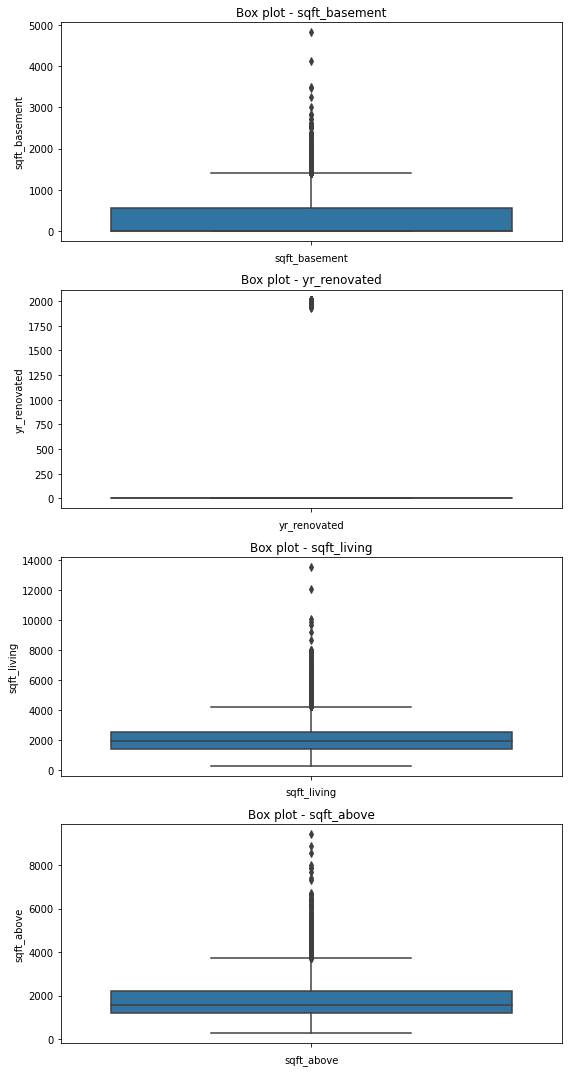

In [733]:
# checking for outliers
col_names = ['sqft_basement', 'yr_renovated', 'sqft_living', 'sqft_above']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=house_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=10)
    fig.tight_layout()

plt.show()
fig.savefig('Outliers.jpeg', dpi=100)
# 'yr_renovated' has very many outliers, followed by 'sqft_basement', then 'sqft_above' and lastly 'sqft_living' has the least outliers

In [734]:
# previewing 'sqft_basement' column
house_data.sqft_basement.head(60)

0        0
1      400
2        0
3      910
4        0
5     1530
6        0
7        0
8      730
9        0
10    1700
11     300
12       0
13       0
14       0
15     970
16       0
17       0
18       0
19       0
20     760
21     720
22       0
23       0
24       0
25       0
26     700
27       0
28     730
29       0
30       0
31       0
32     820
33       0
34     780
35     790
36     730
37       0
38     330
39       0
40       0
41    1620
42       0
43       0
44     360
45       0
46       0
47       0
48       0
49     588
50       0
51    1510
52     410
53     990
54     600
55       0
56       0
57       0
58       0
59       0
Name: sqft_basement, dtype: int64

In [735]:
# From the results about, and also clear in our dataset, 'sqft_basement' and 'yr_renovated' columns have many outliers
# Therefore we drop all the two columns

house_data = house_data.drop(['sqft_basement', 'yr_renovated'], axis=1)

In [736]:
# Previewing the dataset
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,0,0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2,2310,5813,2,0,0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0,1020,1350,2,0,0,3,7,1020,2009,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2,1600,2388,2,0,0,3,8,1600,2004,98027,47.5345,-122.069,1410,1287


In [737]:
# checking for outliers within the dataset
#
# Calculating IQR values
Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1
# Displaying the IQR values
print(IQR)
# Getting hold on outliers
# function for checking for outliers
def outliers(val):
  # using IQR to detect outliers
  outlier = (val < (Q1 - 1.5 * IQR)) |(val > (Q3 + 1.5 * IQR))
  return outlier


price            323050.000
bedrooms              1.000
bathrooms             1.000
sqft_living        1123.000
sqft_lot           5648.000
floors                1.000
waterfront            0.000
view                  0.000
condition             1.000
grade                 1.000
sqft_above         1020.000
yr_built             46.000
zipcode              85.000
lat                   0.207
long                  0.203
sqft_living15       870.000
sqft_lot15         4983.000
dtype: float64


In [738]:
outliers(house_data)

# The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [739]:
# let's now from the calculated IQR score filter out the outliers by keeping only valid values.

# a function to filter out outliers
def removeOutlier(Data):
  Data = Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]
  return Data.shape



In [740]:
# removing outliers
removeOutlier(house_data)

# below is the new shape of our dataset after we've removed outliers

(15530, 17)

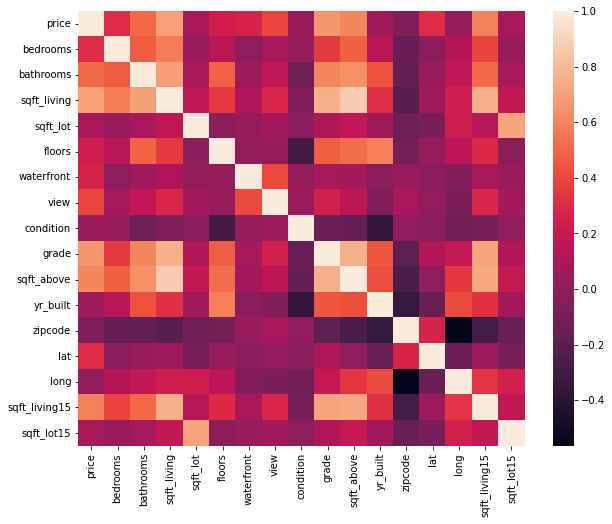

In [741]:
f,ax = plt.subplots(figsize=(10, 8))
corr = house_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Exploratory Design Analysis

## Univariate Analysis

In [742]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [794]:
# describing our data
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


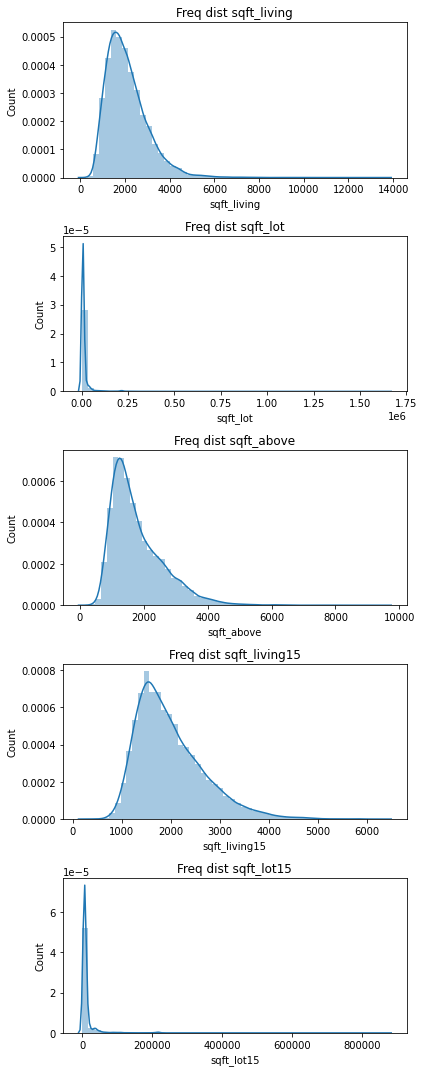

In [743]:
# plotting the univariate distribution of the numerical columns
col_names = ['sqft_living','sqft_lot','sqft_above', 'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(6,15))

for i, col_val in enumerate(col_names):

    sns.distplot(house_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=10)
    ax[i].set_ylabel('Count', fontsize=10)
    fig.tight_layout()

plt.show()
fig.savefig('UnivariateAnalysis.png', dpi=100)

In [744]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [745]:
house_data.bathrooms.value_counts()

2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

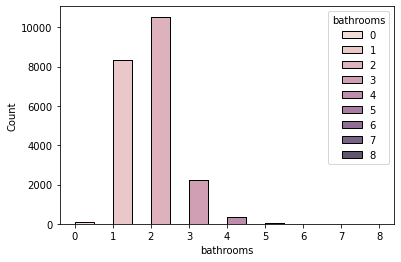

In [746]:

sns.histplot(binwidth=0.5, x="bathrooms", hue="bathrooms", data=house_data, stat="count", multiple="stack")

plt.savefig('No. of Bedrooms.png')

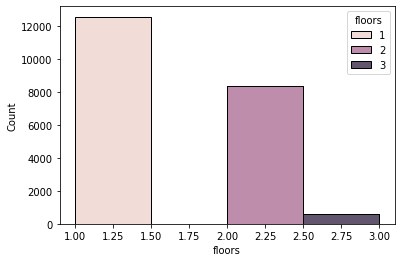

In [747]:

sns.histplot(binwidth=0.5, x="floors", hue="floors", data=house_data, stat="count", multiple="stack")
plt.savefig('No. of floors.jpeg')

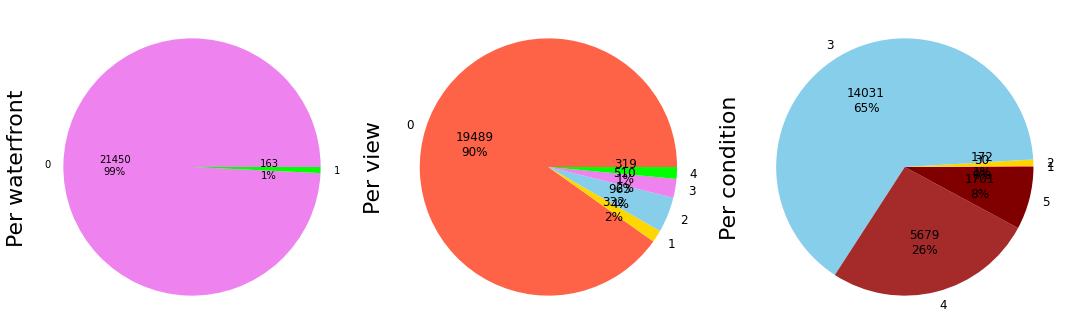

<Figure size 432x288 with 0 Axes>

In [748]:
def label_function(val):
    return f'{val / 100 * len(house_data):.0f}\n{val:.0f}%'


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 10))

house_data.groupby('waterfront').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['violet', 'lime'], ax=ax1)
house_data.groupby('view').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                 colors=['tomato', 'gold', 'skyblue', 'violet', 'lime'], ax=ax2)
house_data.groupby('condition').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                 colors=['tomato', 'gold', 'skyblue', 'brown', 'maroon'], ax=ax3)
ax1.set_ylabel('Per waterfront', size=22)
ax2.set_ylabel('Per view', size=22)
ax3.set_ylabel('Per condition', size=22)
plt.tight_layout()

plt.show()

plt.savefig('PieCharts: waterfront, view and condition.eps')


In [749]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


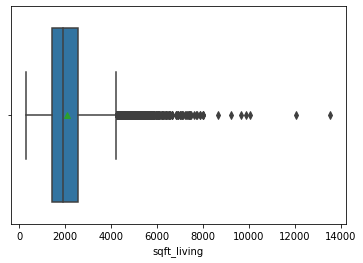

In [750]:
# Numerical univariate analysis
# 
# Creating the boxplot the sqft_living
#
sns.boxplot(house_data["sqft_living"], showmeans=True)
plt.savefig('Boxplot for sqft_living.png')

In [751]:
# # Plotting the histogram for household_size
# #


# plt.subplots(ncols=3, figsize=(20, 12))


# # function to plot the univariate distribution of the Categorical columns
# col_names = ['price', 'sqft_lot', 'sqft_above']
# def drawCategorical(item):
#   draw = house_data[item].plot.bar(title='Freq dist '+item)
#   if item == col_names:
#     return draw
# # bar chart for country column
# drawCategorical('price')

# plt.show()

# # plt.savefig('PieCharts: waterfront, view and condition.eps')
# # df_with_account['household_size'].hist()

## Bivariate Analysis

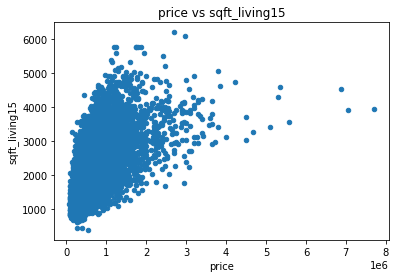

<Figure size 432x288 with 0 Axes>

In [752]:
# Using Pandas: Plotting our scatterplot to compare the variables
house_data.plot(x = 'price', y = 'sqft_living15', kind='scatter')

# Giving our scatterplot a title
plt.title('price vs sqft_living15')

# Labelling our x axis
plt.xlabel('price')

# Labelling our y axis
plt.ylabel('sqft_living15')

plt.show()
plt.savefig('Price vs sqft_living15.png')

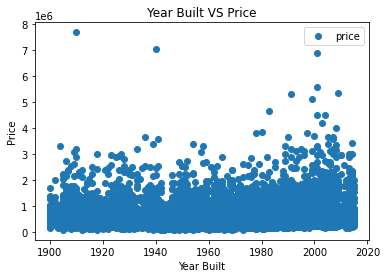

<Figure size 432x288 with 0 Axes>

In [753]:
house_data.plot(x='yr_built', y='price', style='o')
plt.title('Year Built VS Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()
plt.savefig('Year Built VS Price.jpeg')

In [754]:
# Correlations
features1=list(['bedrooms','bathrooms'])
features2=list(['price', 'floors'])
features3=list(['sqft_lot', 'sqft_above'])
# bedroom vs bathrooms
print(house_data[features1].corr())
# price vs floors
print(house_data[features2].corr())
# sqft_lot vs sqft_above
print(house_data[features3].corr())

           bedrooms  bathrooms
bedrooms   1.000000   0.467452
bathrooms  0.467452   1.000000
           price    floors
price   1.000000  0.237207
floors  0.237207  1.000000
            sqft_lot  sqft_above
sqft_lot    1.000000    0.183512
sqft_above  0.183512    1.000000


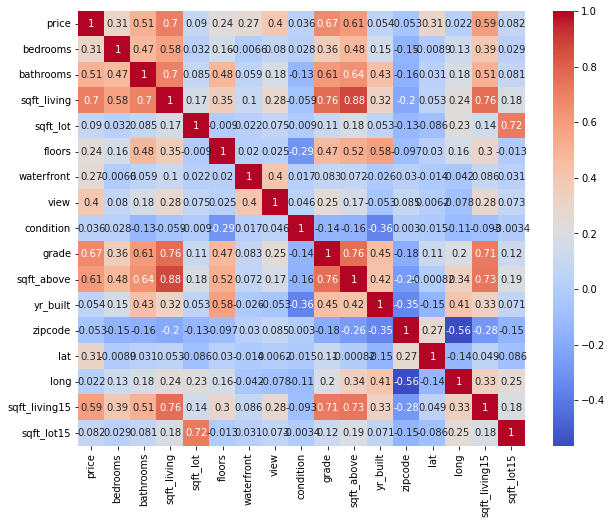

In [755]:
# correlations between the different variables in the dataset
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(house_data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.savefig('Correlations.png')

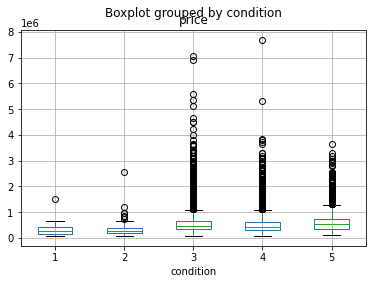

<Figure size 432x288 with 0 Axes>

In [756]:
# Boxplot
house_data.boxplot(column='price', by='condition')
plt.show()
plt.savefig('Price vs condition.png')

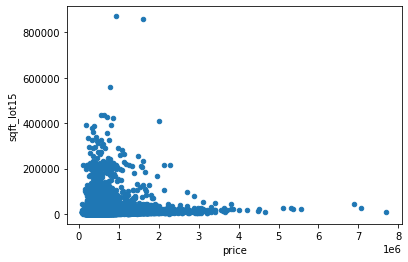

<Figure size 432x288 with 0 Axes>

In [757]:
# Scatter plot for price and sqft_lot15
house_data.plot(x='price', y='sqft_lot15', kind='scatter')
plt.show()
plt.savefig('Price vs sqft_lot15.eps')

## Multivariate Analysis

In [758]:
# Factor Analysis

In [759]:
# previewing the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int64  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int64  
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [760]:
# 1. Adequacy Test
# Before we perform factor analysis,we need to evaluate the “factorability” of our dataset. 
# Factorability means "can we found the factors in the dataset?". 
# There are two methods to check the factorability or sampling adequacy:
# - Bartlett’s Test
# - Kaiser-Meyer-Olkin Test
# ---
# We will use Bartlett’s test of sphericity to check whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, 
# we should not employ a factor analysis.
# ---

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(house_data)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(198827.72963311165, 0.0)

In [761]:
# 2. Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(house_data, 11, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 5-factors eigenvalues are greater than one. 
# It means we need to choose only 5 factors (or unobserved variables).

,Original_Eigenvalues
0,5.554123
1,2.160369
2,1.808597
3,1.265394
4,1.204630
5,0.910003
6,0.704996
7,0.656837
8,0.528252
9,0.440244


In [762]:
# 3. Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(house_data, 5, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for price,bedrooms,bathrooms,sqft_living,grade,sqft_above and sqft_living15 
# Factor 2 has high factor loadings for has_a_bank_account,cell_phone_access, and level_of_education 
# Factor 3 has high factor loadings for sqft_lot, and sqft_lot15
# Factor 4 has high factor loadings for floors and yr_built
# Factor 5 has high factor  loadings for waterfront, and view
# It is therefore good if we take all the five factors.

,Factor1,Factor2,Factor3,Factor4,Factor5
price,0.734607,-0.192072,0.040408,-0.029537,0.376437
bedrooms,0.560477,0.071060,-0.027186,-0.028045,-0.074109
bathrooms,0.677136,0.019216,0.018804,0.320977,0.053172
sqft_living,0.950154,0.042863,0.109683,0.084309,0.105924
sqft_lot,0.080250,0.111776,0.803181,-0.004724,0.032153
floors,0.342693,-0.002649,-0.043784,0.671509,0.002446
waterfront,0.033774,-0.006751,0.005158,-0.005963,0.584814
view,0.211089,-0.089553,0.053768,-0.058753,0.661196
condition,-0.012926,-0.011421,-0.013775,-0.451941,0.031689
grade,0.774529,0.004613,0.058340,0.321246,0.164912


In [763]:
# 5. Getting variance of each factors
# 
fa.get_factor_variance()

# Noting total 58% cumulative Variance explained by the 5 factors.

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,4.445143,1.388048,1.478894,1.569107,1.012854
Proportion Var,0.261479,0.081650,0.086994,0.092300,0.059580
Cumulative Var,0.261479,0.343129,0.430123,0.522423,0.582003


# Performing Regression Analysis

## Detecting multicollinearity 

In [764]:
# Remove the price column, we want to focus on our independent variables only.
independent_only = house_data.drop(columns=['price'])
# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.154178,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,-0.126016,0.606631,0.639933,0.433647,-0.159773,0.031351,0.179351,0.510049,0.080779
sqft_living,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.318049,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.053080,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,0.578619,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,-0.026161,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,-0.053440,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.126016,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,-0.361417,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.606631,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.446963,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.639933,0.876597,0.183512,0.517913,0.072075,0.167649,-0.158214,0.755923,1.000000,0.423898,-0.261190,-0.000816,0.343803,0.731870,0.194050


In [765]:
# The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, 
# as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. 
# This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above

In [766]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.621385,-0.283878,-1.110405,0.050615,0.077700,0.063967,0.111925,-0.067094,0.281940,0.048903,0.024432,0.079911,0.043077,0.023643,0.026599,0.093135
bathrooms,-0.283878,2.389666,-1.496671,-0.028852,-0.530882,0.007182,-0.040723,-0.013514,-0.166657,0.338921,-0.362606,0.008383,-0.018689,0.057083,0.161282,0.041355
sqft_living,-1.110405,-1.496671,7.998079,-0.083199,1.093306,-0.015940,-0.541886,-0.251497,-1.083552,-4.615260,0.122579,-0.125449,-0.170384,0.294534,-1.029698,-0.102729
sqft_lot,0.050615,-0.028852,-0.083199,2.102540,0.055143,0.028446,-0.058280,0.026664,-0.052457,-0.119504,0.081024,-0.002976,0.052335,-0.132027,0.160203,-1.458490
floors,0.077700,-0.530882,1.093306,0.055143,2.159558,-0.010736,-0.052510,0.098294,-0.259266,-1.500553,-0.821218,-0.148057,-0.130911,0.173449,0.230451,0.094605
waterfront,0.063967,0.007182,-0.015940,0.028446,-0.010736,1.200039,-0.495074,-0.001027,0.043838,-0.103974,0.007394,0.024477,0.012244,0.024728,0.061339,-0.019473
view,0.111925,-0.040723,-0.541886,-0.058280,-0.052510,-0.495074,1.433946,-0.015805,-0.188943,0.525506,0.173181,-0.138940,0.120206,0.068575,-0.322322,-0.008605
condition,-0.067094,-0.013514,-0.251497,0.026664,0.098294,-0.001027,-0.015805,1.210500,-0.048779,0.254092,0.431403,0.156367,0.054365,0.004554,0.058807,-0.021721
grade,0.281940,-0.166657,-1.083552,-0.052457,-0.259266,0.043838,-0.188943,-0.048779,3.395712,-0.687735,-0.617910,0.085510,-0.330548,0.389920,-0.897182,0.071808
sqft_above,0.048903,0.338921,-4.615260,-0.119504,-1.500553,-0.103974,0.525506,0.254092,-0.687735,6.625553,0.318715,0.040737,0.325372,-0.612486,-0.601435,-0.077144


Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. bedrooms has a score of 1.621, sqft_living has a score of 7.998, sqft_above has a score of 6.625 etc.
sqft_living and sqft_above have values above 5, let's see how the VIF scores improve if we remove them from our dataset

In [767]:
revised = independent_only.drop(columns=['sqft_living','sqft_above'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.378819,-0.570044,0.014043,0.099587,0.044850,0.068480,-0.085734,-0.064615,0.099622,0.057766,0.053337,-0.001566,-0.294947,0.058496
bathrooms,-0.570044,2.040107,-0.066605,-0.441462,-0.010788,-0.113942,-0.046146,-0.543299,-0.288094,-0.019284,-0.020505,0.053596,-0.189739,0.004065
sqft_lot,0.014043,-0.066605,2.094593,0.029750,0.023495,-0.054920,0.028654,-0.119238,0.098763,-0.005619,0.060162,-0.147671,0.098945,-1.465326
floors,0.099587,-0.441462,0.029750,1.819231,-0.033396,0.068273,0.156589,-0.399329,-0.752496,-0.137855,-0.057786,0.036060,0.108788,0.078705
waterfront,0.044850,-0.010788,0.023495,-0.033396,1.196775,-0.490076,0.001584,0.004177,0.018762,0.023323,0.018389,0.012675,0.025138,-0.023575
view,0.068480,-0.113942,-0.054920,0.068273,-0.490076,1.385802,-0.038697,-0.191836,0.160570,-0.145739,0.096468,0.112298,-0.327870,-0.008238
condition,-0.085734,-0.046146,0.028654,0.156589,0.001584,-0.038697,1.199595,-0.046743,0.424548,0.153293,0.042763,0.025985,0.059309,-0.021199
grade,-0.064615,-0.543299,-0.119238,-0.399329,0.004177,-0.191836,-0.046743,2.813831,-0.472252,0.058026,-0.278393,0.283183,-1.432873,0.012684
yr_built,0.099622,-0.288094,0.098763,-0.752496,0.018762,0.160570,0.424548,-0.472252,2.190366,0.268333,0.280988,-0.465909,0.151772,-0.015938
zipcode,0.057766,-0.019284,-0.005619,-0.137855,0.023323,-0.145739,0.153293,0.058026,0.268333,1.655152,-0.311456,0.737349,0.186811,-0.018582


All scores dropped, but the sqft_lot, waterfront, view, condition, yr_built, zipcode, lat, long, sqft_living15, sqft_lot15  in particular did quite a bit, indicating that sqft_lot, waterfront, view, condition, yr_built, zipcode, lat, long, sqft_living15, sqft_lot15 and sqft_living and sqft_above were colinear.

## Residual plots and heteroskedasticity testing

Let's start by creating a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [768]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = house_data['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for price based on our model
price_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()


4783.132833878242

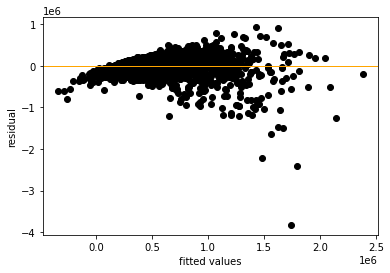

In [769]:
# Let's show the residual plot
import matplotlib.pyplot as plt

plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='orange', linewidth=1)
plt.show()

Our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [770]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## Multiple Regression

In [771]:
# previewing our dataset
house_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,0,0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2,2310,5813,2,0,0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0,1020,1350,2,0,0,3,7,1020,2009,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2,1600,2388,2,0,0,3,8,1600,2004,98027,47.5345,-122.069,1410,1287


In [772]:
# Setting up our X and y datasets
#
X = house_data[['bedrooms',	'bathrooms',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'grade', 'yr_built',
               'zipcode',	'lat',	'long',	'sqft_living15',	'sqft_lot15']]
y = house_data['price']

In [773]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [774]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [775]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
#


coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# From the output, this means that for a unit increase in "petrol_tax", 
# there is a decrease of 24.19 million gallons in gas consumption. 
# Similarly, a unit increase in proportion of population with a drivers license 
# results in an increase of 1.324 billion gallons of gas consumption. 
# We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

,Coefficient
bedrooms,2623.142217
bathrooms,106557.610799
sqft_lot,0.299614
floors,12503.545312
waterfront,658554.092503
view,57998.715778
condition,26990.005541
grade,140525.177834
yr_built,-3152.907197
zipcode,-526.765141


In [776]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
17384,297000.0,2.933943e+05
722,1580000.0,1.532048e+06
2680,562100.0,4.227792e+05
18754,631500.0,6.614120e+05
14554,780000.0,8.878736e+05
...,...,...
5427,844000.0,1.095600e+06
16547,335500.0,4.768903e+05
4585,369950.0,3.782646e+05
17762,300000.0,2.221406e+05


In [777]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We can see that the value of root mean squared error is 200692.68, 
# which is slightly greater than 10% of the mean value of the gas consumption in all states. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Absolute Error: 128082.3879403468
Mean Squared Error: 40277552631.989174
Root Mean Squared Error: 200692.6820588862


## Ridge Regression


In [778]:
# The model above forms our baseline regression model
# This is a model that has no regularization to it
# 

first_model = (mean_squared_error(y_true=y_test,y_pred=regressor.predict(X_test)))
print(first_model)

# The output  value of 40277552631.9891 will be our indicator to determine if the regularized ridge regression model is superior or not.

40277552631.989174


In [779]:
from sklearn.linear_model import Ridge
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [780]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
# {'alpha': 0.01}
# abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was. 

{'alpha': 0.01}

In [781]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))
print(second_model)

40068200631.54535


In [782]:
# The 40068200631.54535 is lower than the 40277552631.9891. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,revised.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 106557.61079896506,
 'bedrooms': 2623.1422172452626,
 'condition': 26990.00554119172,
 'floors': 12503.545311827367,
 'grade': 140525.1778343005,
 'lat': 578063.8531235581,
 'long': -167131.55505965088,
 'sqft_living15': 97.26053803086324,
 'sqft_lot': 0.29961430716502946,
 'sqft_lot15': -0.2692335911197006,
 'view': 57998.7157784862,
 'waterfront': 658554.092502881,
 'yr_built': -3152.907197377678,
 'zipcode': -526.7651408921676}

## Lasso Regression

In [783]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler


# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [784]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6641315077570172
lasso MSE: 45325038275.54096
lasso coef: [  1092.17630331  77625.21450882  10686.56172226   6259.21505999
  54303.4068852   44367.41791632  17876.39266005 166490.45055811
 -91522.6037839  -28650.22429478  80269.74661917 -22896.07889181
  63906.81488848  -4955.16191063]


In [785]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 

import warnings
warnings.filterwarnings("ignore")


parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)



lasso best parameters: {'alpha': 24.0}
lasso score: 0.661840775448292
linear score: 0.6617745253449181
lasso MSE: 40269663243.91679
linear MSE: 40277552631.989174
lasso best estimator coef: [ 2.58183478e+03  1.06557575e+05  2.98662501e-01  1.24331380e+04
  6.55123897e+05  5.81292592e+04  2.69209518e+04  1.40594109e+05
 -3.15639798e+03 -5.23375314e+02  5.76523401e+05 -1.65014947e+05
  9.72171757e+01 -2.70437426e-01]
linear coef: [ 2.62314222e+03  1.06557611e+05  2.99614307e-01  1.25035453e+04
  6.58554093e+05  5.79987158e+04  2.69900055e+04  1.40525178e+05
 -3.15290720e+03 -5.26765141e+02  5.78063853e+05 -1.67131555e+05
  9.72605380e+01 -2.69233591e-01]


In [786]:
# The 40269663243.91679 is slightly lower than the 40277552631.9891. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is very little difference between the lasso and baseline models. 
# This is confirmed with the coefficients of each model found below.

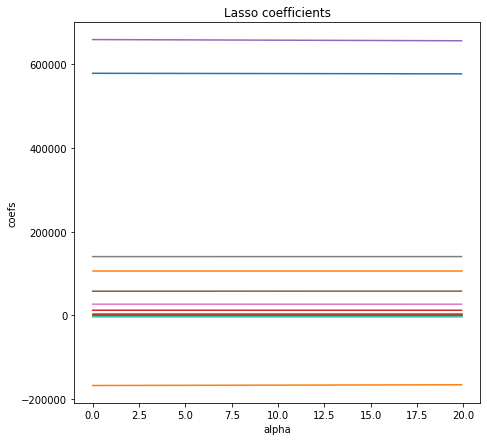

<Figure size 432x288 with 0 Axes>

In [787]:
 # Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

plt.savefig('Lasso Coefficients.jpeg')
# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

## Elastic Net Regression

In [788]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [789]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
#abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [790]:
# The best hyperparameters was an alpha set to 1e-05 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 5.26498409+18. This is above our baseline model of MSE 40277552631.9891  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
print(second_model)

5.264984099628597e+18


## Quantile Regression

In [791]:
# Setting up our X and y datasets
#
X = house_data[['bedrooms',	'bathrooms',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'grade', 'yr_built',
               'zipcode',	'lat',	'long',	'sqft_living15',	'sqft_lot15']].values.reshape(-1, 1)
y = house_data['price'].values.reshape(-1, 1)

In [792]:
y.shape

(21613, 1)

In [793]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y_test) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X_test, y_pred1)))

Mean squared error: 40277552631.99
Variance score: 1.00


Text(0.5, 1.0, 'Data with non-constant variance')

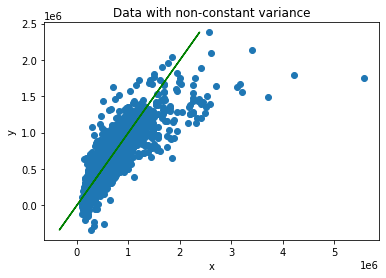

In [707]:
# visualizing data with non_constant variance
plt.figure(3)
plt.scatter(y_test, y_pred1)
plt.plot(y_pred2, regressor.predict(X_test), color = 'green')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

# From our graph, we will get to see that a phenomenon
# where the variability of y is unequal across the range 
# of values of x is called as Heteroscedasticity. 
# As it will be seen in the plot it takes the shape of a cone. 
# The y variable widens as the value of x increases.

# Conclusion

From above analysis it is clear that the given data suffers Multicollinearity and that the variability of a given dependent variable is even (homoscedasticity) across the range of values of an independent variable that predicts it.
From the correlation computed, we see that sqft_lot, waterfront, view, condition, yr_built, zipcode, lat, long, sqft_living15, sqft_lot15 and sqft_living and sqft_above were colinear.
It is also clear that our residuals are centered around a mean that is very close to 0. For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal(homogenous) for all our datapoints.

From the different models used for prediction, it will be true to say that the housing price will be likely to fall due to the high RMSEs discovered in every model.

# Recommendations

From the results of the analysis, it would be advisable that the company considers improving such things as sqft_lot, waterfront, view, condition, yr_built, zipcode, lat, long, sqft_living15, sqft_lot15 instead of sqft_living and sqft_above so as to improve the housing prices in future.

# Challenging the solution

Having performed the regression with multiple independent variables, it is always good try perform the prediction with every single independent variable and see the individual impact each variable has towards the target variable. 
We can also compare our predictions with other companies similar to Hass Consulting Company to see their operations as per the models formed.

# Follow up questions

 At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the relevant data?

b). Do we need other data to answer our question?

c). Did we have the right question?

d) Have we answerered our research question given the metrics for success?